In [1]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2

__Setting up the directory to access__

In [2]:
# set paths for accessing the datasets
data_dir = 'dataset/'                 #assigns the directory path where the dataset is located.
train_path = 'dataset/Train.csv'         #assigns the directory path for the training data within the dataset
test_path = 'dataset/Test.csv'               #assigns the directory path for the testing data within the dataset.

meta_path='dataset/Meta.csv'

In [3]:
type(data_dir)

str

In [4]:
traindf=pd.read_csv(train_path)
testdf=pd.read_csv(test_path)
metadf=pd.read_csv(meta_path)

In [5]:
# setting the label for each folders containing numeric values
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

__Checking the total images in test and train__

In [6]:
# test image
img_test='Test/'

print('Test Directory')
# stores all the test images files 
files_testpath=os.listdir(img_test)
files_testpath

# total length files in the test image
len_files_testpath=len(files_testpath)
print('Number of image : ',len_files_testpath)

png_cnt=0
jpg_cnt=0

# finding the number of png and jpg image
for imgfile in files_testpath:
    if imgfile.endswith('png'):
        png_cnt+=1
    elif imgfile.endswith('jpg') or imgfile.endswith('jpeg'):
        jpg_cnt+=1

print("Total png images : ",png_cnt)
print("Total jpg images : ",jpg_cnt)



Test Directory
Number of image :  12631
Total png images :  12630
Total jpg images :  0


In [7]:
# train image
img_train='Train/'

print('Train Directory')

# stores all the test images files 
files_trainpath=os.listdir(img_train)
# sorting the folder names in order
files_trainpath.sort(key=lambda x: int(x))
len_files_trainpath=len(files_trainpath)
print("Total folders : ",len_files_trainpath)

jpg_cnt=0
png_cnt=0

# finding the number of png and jpg image
for foldernames in files_trainpath:
    # folder 'Train/0'
    folderpath = os.path.join(img_train, foldernames)
    # print(folderpath)
    # check if its directory 'Train/.png'
    if os.path.isdir(folderpath):
        # all the images files of the current folder and iterated till next folders
        files_in_folder = os.listdir(folderpath)
        # iterating all the images of each folder to check format
        for imgfiles in files_in_folder:
            if imgfiles.endswith('.jpg') or imgfiles.endswith('.jpeg'):
                jpg_cnt+=1
            elif imgfiles.endswith('.png'):
                png_cnt+=1

print("Total png image : ",png_cnt)
print("Total jpg image : ",jpg_cnt)
                



Train Directory
Total folders :  43
Total png image :  39209
Total jpg image :  0


__What colors exist in the image__

In [ ]:
# number of images for each colour ID from Train
trainmeta_df = pd.merge(traindf, metadf, on='ClassId')

coloredf = trainmeta_df.groupby(['ClassId', 'ColorId']).size().reset_index(name='ImageCount')

filtercoloredf = coloredf.groupby('ColorId').sum().reset_index()

filtercoloredf.drop(columns=['ClassId'], inplace=True)

print("Number of images for each color ID (Train):")
print(filtercoloredf)


Number of images for each color ID (Train):
   ColorId  ImageCount
0        0       30330
1        1        5639
2        2        2100
3        3        1140


In [9]:
metadf.head()

Path  ClassId  ShapeId  ColorId SignId
0  Meta/27.png       27        0        0   1.32
1   Meta/0.png        0        1        0   3.29
2   Meta/1.png        1        1        0   3.29
3  Meta/10.png       10        1        0   3.27
4  Meta/11.png       11        0        0   1.22

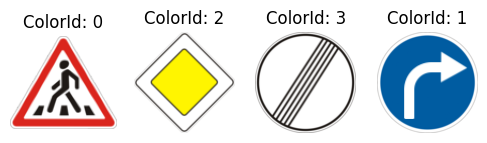

In [ ]:
# colorid list to store the each unique id of the image
colorid_list = []

# Initialize a counter for subplots
subplot_count = 1

# Initialize a figure for subplots
fig = plt.figure(figsize=(5, 5))

# iterate through metadf dataframe
for i, row in metadf.iterrows():
    # capturing the unique value from the colorid column
    if row['ColorId'] not in colorid_list:
        colorid_list.append(row['ColorId'])
        
        # accessing the meta folder : 'Meta/png'
        # row['Path'] is the column from the meta.csv which holds the path of the image
        img_path = '' + row['Path']

        # reading the image
        img = mpimg.imread(img_path)

        # subplot 4 rows and 4 cols
        ax = fig.add_subplot(4, 4, subplot_count)
        ax.imshow(img)
        ax.axis('off')  # Turn off axis labels
        ax.set_title(f"ColorId: {row['ColorId']}")
        
        # increment subplot to plot the image next to each other
        subplot_count += 1
        

plt.tight_layout()
plt.show()

## Visualising some sample images for train, test and meta directory

In [12]:
# sample image of train data
traindf

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0         27      26       5       5      22      20       20   
1         28      27       5       6      23      22       20   
2         29      26       6       5      24      21       20   
3         28      27       5       6      23      22       20   
4         28      26       5       5      23      21       20   
...      ...     ...     ...     ...     ...     ...      ...   
39204     52      56       5       6      47      51       42   
39205     56      58       5       5      51      53       42   
39206     58      62       5       6      53      57       42   
39207     63      69       5       7      58      63       42   
39208     68      69       7       6      62      63       42   

                                 Path  
0      Train/20/00020_00000_00000.png  
1      Train/20/00020_00000_00001.png  
2      Train/20/00020_00000_00002.png  
3      Train/20/00020_00000_00003.png  
4      Train/20/00020_00000_00004.png  
...                               ...  
39204  Train/42/00042_00007_00025.png  
39205  Train/42/00042_00007_00026.png  
39206  Train/42/00042_00007_00027.png  
39207  Train/42/00042_00007_00028.png  
39208  Train/42/00042_00007_00029.png  

[39209 rows x 8 columns]

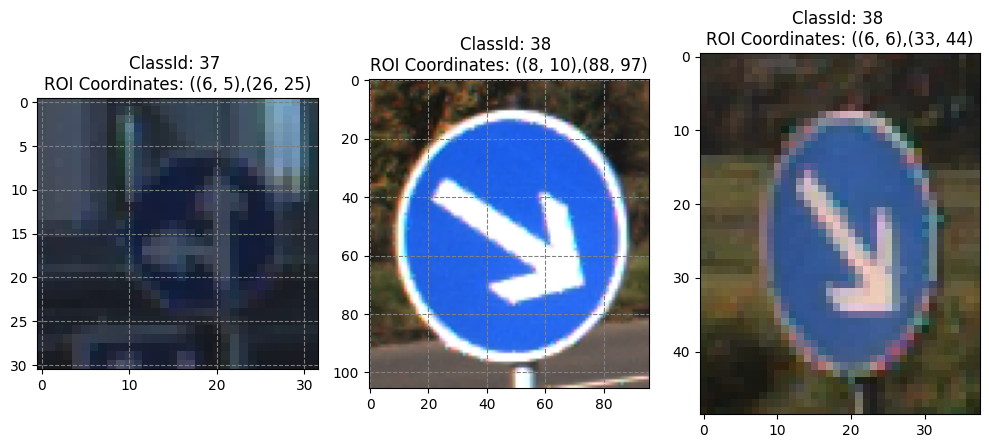

In [ ]:
# train data image

# random train image samples
train_samples = traindf.sample(n=5)

fig, axes = plt.subplots(1, 3, figsize=(10, 10))

# loop each random sample from traindf
for ax, (_, row) in zip(axes, train_samples.iterrows()):
    # loading the iamge from the traindf which has the Path column
    img = cv2.imread(row['Path'])

    # covert bgr img to rgb since, cv2 and matplot follow BGR format making the red image to blue
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # obtainig the coordinates from the traindf
    x1, y1, x2, y2 = row['Roi.X1'], row['Roi.Y1'], row['Roi.X2'], row['Roi.Y2']

    # below line of code will draw the rectangle using the ROI coordinates
    # cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # for plotting the image
    ax.imshow(img_rgb)
    ax.set_title(f"ClassId: {row['ClassId']} \nROI Coordinates: ({x1,y1},{x2,y2}")
    # to visualise along with axis
    ax.axis('on') 
    ax.grid(True, which='both', color='gray', linestyle='--')

plt.tight_layout()
plt.grid()
plt.show()


Test/05995.png
Test/09997.png
Test/03297.png


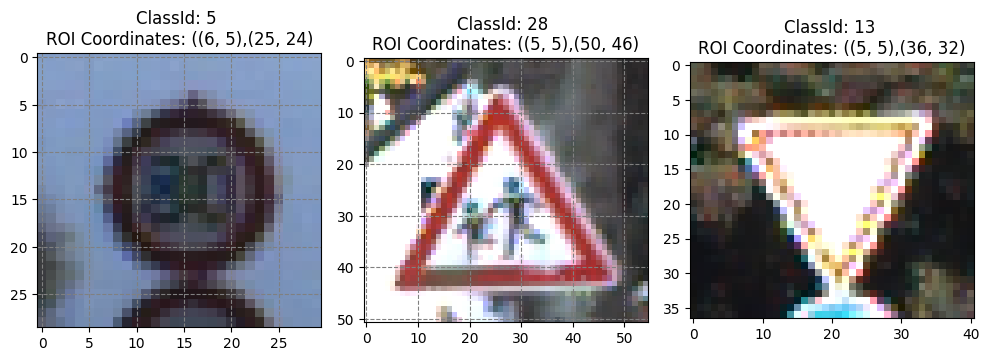

In [ ]:
# test data image

# random train image samples
test_samples = testdf.sample(n=5)

fig, axes = plt.subplots(1, 3, figsize=(10, 10))

# loop each random sample from traindf
for ax, (_, row) in zip(axes, test_samples.iterrows()):
    # loading the iamge from the traindf which has the Path column
    img = cv2.imread(row['Path'])
    print(row['Path'])

    # covert bgr img to rgb since, cv2 and matplot follow BGR format making the red image to blue
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # obtainig the coordinates from the traindf
    x1, y1, x2, y2 = row['Roi.X1'], row['Roi.Y1'], row['Roi.X2'], row['Roi.Y2']

    # below line of code will draw the rectangle using the ROI coordinates
    # cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # for plotting the image
    ax.imshow(img_rgb)
    ax.set_title(f"ClassId: {row['ClassId']} \nROI Coordinates: ({x1,y1},{x2,y2}")
    # to visualise along with axis
    ax.axis('on') 
    ax.grid(True, which='both', color='gray', linestyle='--')

plt.tight_layout()
plt.grid()
plt.show()


__Visualize bounding boxes for random samples__

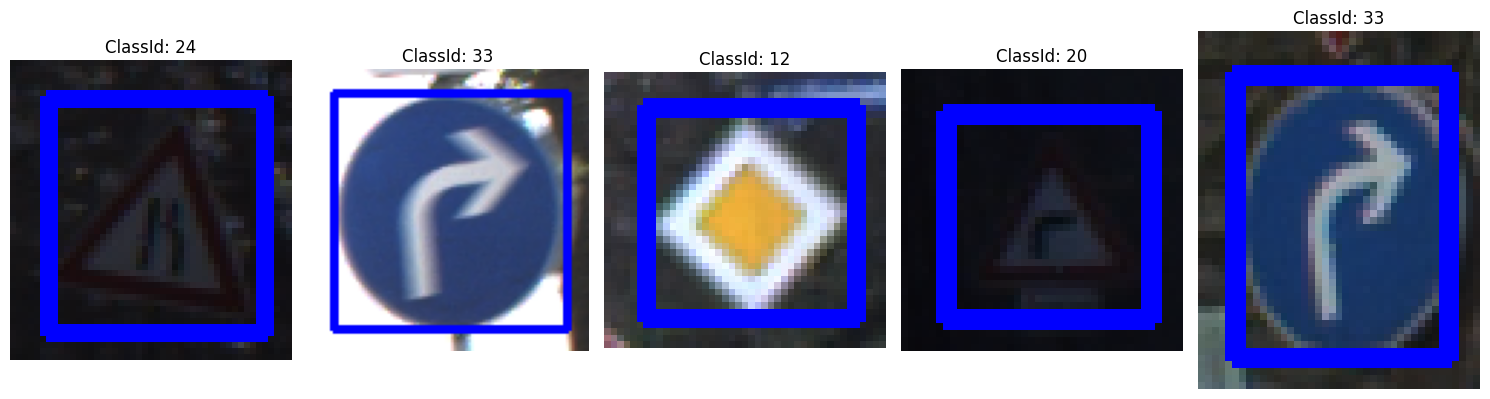

In [ ]:
# setting the size and subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
# # loop traindf random sample
for ax, (_, row) in zip(axes, traindf.sample(5).iterrows()):
    # loading the iamge from the traindf which has the Path column
    img = cv2.imread(row['Path'])
    # obtainig the coordinates from the traindf
    x1, y1, x2, y2 = row['Roi.X1'], row['Roi.Y1'], row['Roi.X2'], row['Roi.Y2']
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    
    # covert bgr img to rgb since, cv2 and matplot follow BGR format making the red image to blue
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    ax.imshow(img_rgb)
    ax.set_title(f"ClassId: {row['ClassId']}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# Distribution of the train and test data

C:\Users\sanja\AppData\Local\Temp\ipykernel_50104\3075843166.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ClassId', data=traindf, palette='Set2')


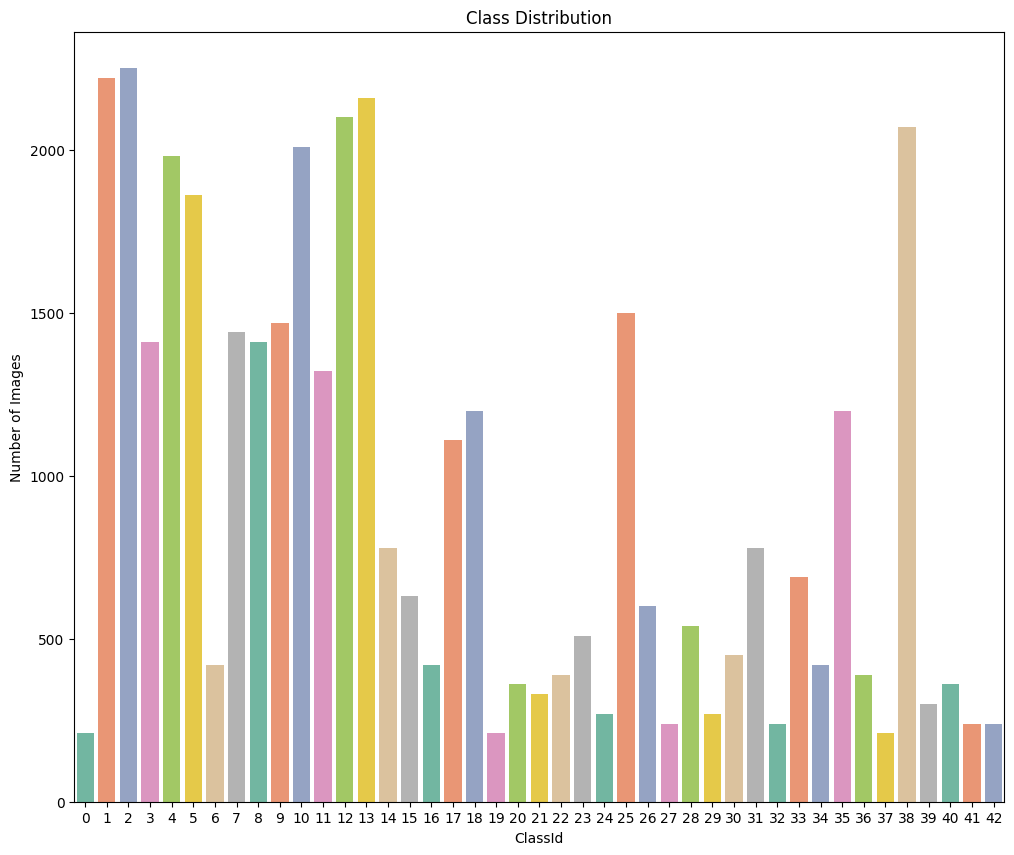

In [16]:
import seaborn as sns

# distribution of the train data
plt.figure(figsize=(12, 10))
sns.countplot(x='ClassId', data=traindf, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('ClassId')
plt.ylabel('Number of Images')
plt.show()

C:\Users\sanja\AppData\Local\Temp\ipykernel_50104\709105774.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ClassId', data=testdf, palette='Set2')


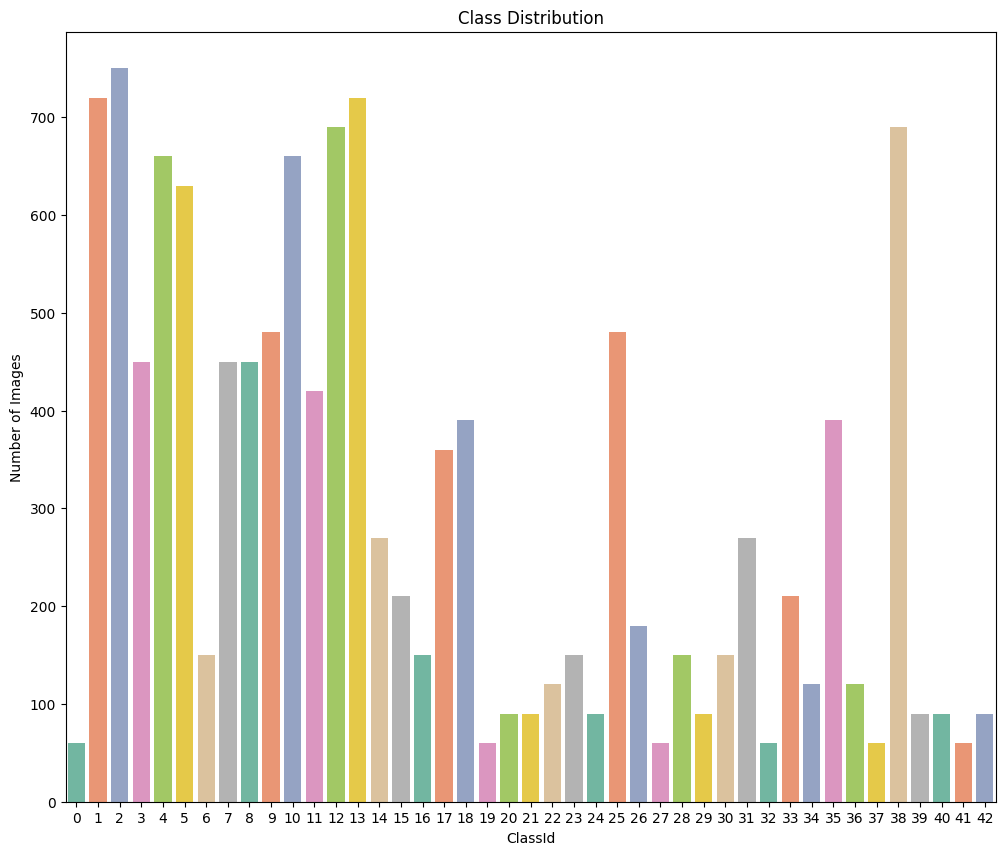

In [17]:
import seaborn as sns

# distribution of the test data
plt.figure(figsize=(12, 10))
sns.countplot(x='ClassId', data=testdf, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('ClassId')
plt.ylabel('Number of Images')
plt.show()

__Class Imbalance__

C:\Users\sanja\AppData\Local\Temp\ipykernel_50104\679593858.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


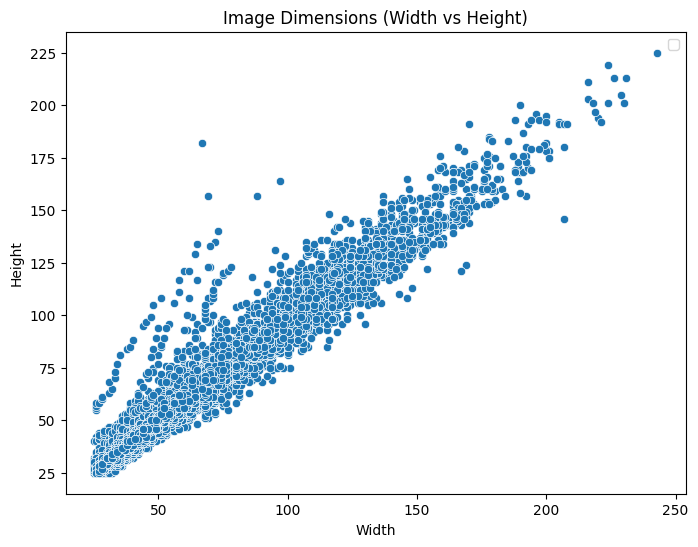

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Width', y='Height', data=traindf)
plt.title('Image Dimensions (Width vs Height)')
plt.xlabel('Width')
plt.ylabel('Height')
plt.legend()
plt.show()

__we will go through each 43 folders__

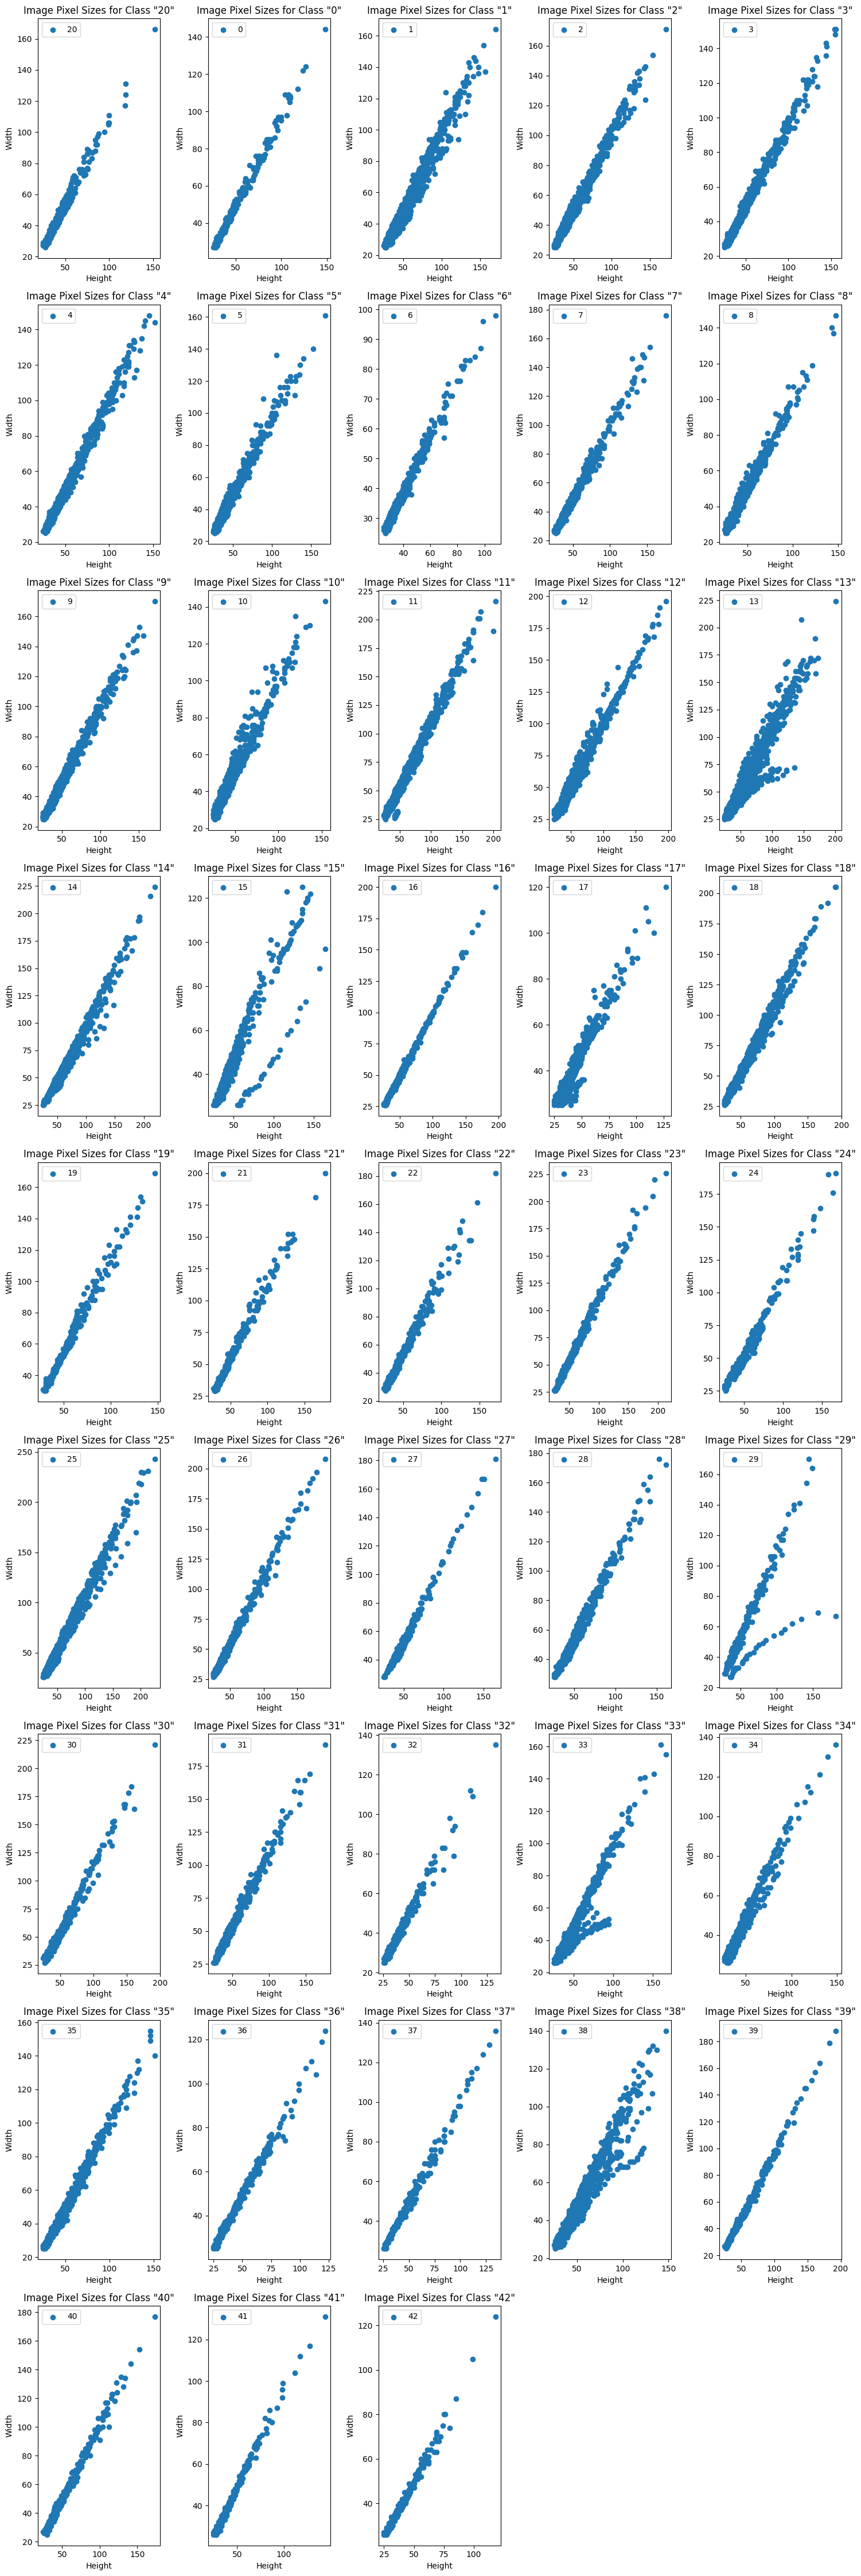

In [ ]:
import pandas as pd
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt

# storing all the names of folders which is same as class IDs
uniqueclassId = traindf['ClassId'].unique()

# number of folders
lenfolders = len(uniqueclassId)

cols = 5

rows = (lenfolders - 1) // cols + 1
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# iterating each unique classid
for i, class_id in enumerate(uniqueclassId):
    # class_id holds all the folder names
    # number of figure on first row, followed by other rows
    row = i // cols  # Integer division to get the row index
    # image to be set on first col, second col and so on.
    col = i % cols   # modulus operation to get the column index

    # storing the details of those rows which has belongs to specific class id
    # this will plot the height and width of those image in a separate graph, holding same class id
    sameclassId = traindf[traindf['ClassId'] == class_id]

    

    # ----------------------------------------------------------
    ax = axes[row, col]  
    ax.scatter(sameclassId['Height'], sameclassId['Width'], marker='o', label=class_id)
    ax.set_xlabel('Height')
    ax.set_ylabel('Width')
    ax.set_title(f'Image Pixel Sizes for Class "{class_id}"')
    ax.legend()

for i in range(lenfolders, rows * cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()


## Image dimension and aspect ratio analysis

Image Dimension Summary:
              width        height
count  39209.000000  39209.000000
mean      50.835880     50.328930
std       24.306933     23.115423
min       25.000000     25.000000
25%       35.000000     35.000000
50%       43.000000     43.000000
75%       58.000000     58.000000
max      243.000000    225.000000


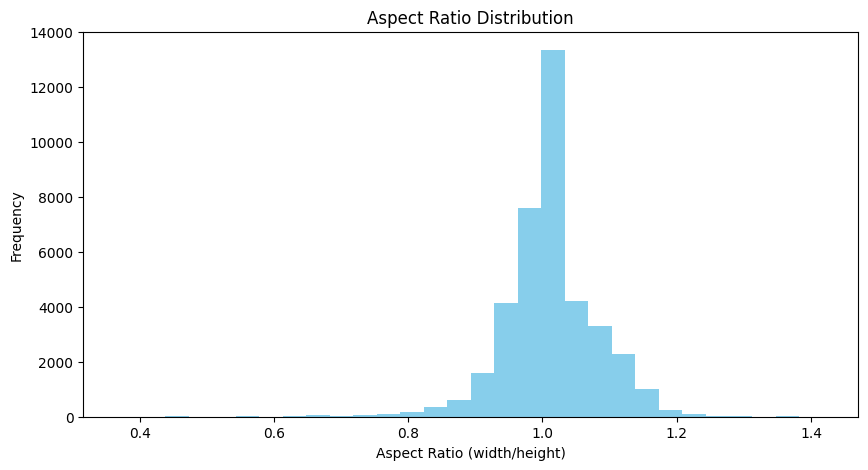

In [ ]:
# we will store the image height and width
dimensions = []
# we will store the image width/hwight value
aspect_ratios = []

for i, row in traindf.iterrows():
    # row['Path'] is the column from the meta.csv which holds the path of the image
    img_path = '' + row['Path']
    # readaing the image
    image = cv2.imread(img_path)
    # extracting only height and width of the image
    h, w = image.shape[:2]

    dimensions.append((w, h))
    aspect_ratios.append(w / h)

# dataframe to store the obtained height and width of the image to observe the distribution
dimensiondf = pd.DataFrame(dimensions, columns=["width", "height"])
print("Image Dimension Summary:")
print(dimensiondf.describe())

plt.figure(figsize=(10, 5))
plt.hist(aspect_ratios, bins=30, color="skyblue")
plt.title("Aspect Ratio Distribution")
plt.xlabel("Aspect Ratio (width/height)")
plt.ylabel("Frequency")
plt.show()


__Pixel Intensity Distribution__

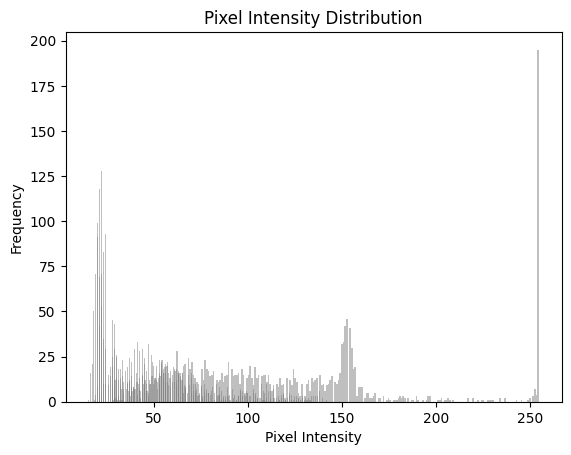

In [ ]:
# sample a few images and plot their pixel intensity distribution (grayscale or RGB channels)
sample_images = traindf.sample(5)
for idx, row in sample_images.iterrows():
    img_path = '' + row['Path']
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # convert to grayscale if RGB is not necessary
    plt.hist(image.ravel(), bins=256, color="gray", alpha=0.5)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


__Mean and Standard Deviation of Color Channel__

In [ ]:
# list for calulating mean and standard deviation for each color channel
means, stds = [], []

for idx, row in traindf.iterrows():
    # row['Path'] is the column from the meta.csv which holds the path of the image
    img_path = '' + row['Path']
    
    image = cv2.imread(img_path) / 255.0  # normalize to [0, 1] range
    means.append(image.mean(axis=(0, 1)))
    stds.append(image.std(axis=(0, 1)))

mean_channels = np.mean(means, axis=0)
std_channels = np.mean(stds, axis=0)

print(f"Channel Means: {mean_channels}")
print(f"Channel Standard Deviations: {std_channels}")


Channel Means: [0.32141543 0.31212966 0.34023045]
Channel Standard Deviations: [0.17848932 0.16829375 0.16802703]


# Image Augmentation

Data augmentation is the modified version of the image. This may involve modification of image such as rotation, changing size, scaling the image, noise addition (making image blur) etc.


In [ ]:
# image augmetentation
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Function to load and preprocess image
def loadimg(image_path):
    """
    Load and preprocess image from the given file path.
    
    Args:
    image_path (str): Path to the image file.
    
    Returns:
    numpy.ndarray: Preprocessed image array.
    """
    # loading the image
    #  load_img function loads the image, but to feed it into a neural network or perform any other operation (like transformations, augmentations, etc.), the image needs to be converted into a numerical format
    image = load_img(image_path)
    
    # convert image to array for preprocessing and such as normalization resizing
    image_array = img_to_array(image)
    
    # preprocessing steps (e.g., normalization, resizing) can be added here
    
    return image_array

# path for storing the augmented image
outputpath = 'augemented data'

# image augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Random rotation between 0 and 20 degrees
    width_shift_range=0.1,  # Randomly shift width by up to 10%
    height_shift_range=0.1,  # Randomly shift height by up to 10%
    zoom_range=0.2,  # Random zoom up to 20%
    horizontal_flip=True,  # Random horizontal flips
    vertical_flip=True,  # Random vertical flips
    brightness_range=[0.8, 1.2]  # Random brightness adjustments
)

# Generate augmented images and save them to the output directory
for class_label in os.listdir(img_train):
    # class_label are the the list of folder names i.e. 0,1,2,3,4...43
    
    # image train folder directory
    # access each folder from 0 to 43 and get the images from each
    imgfolders = os.path.join(img_train, class_label)
    
    # augemented image directory
    # create each 0 to 42 folders
    aug_class_path = os.path.join(outputpath, class_label)
    
    # create augmented directory
    os.makedirs(aug_class_path, exist_ok=True)
    
    # acessing each image from thr imgfolders
    for image_file in os.listdir(imgfolders):
        
        # accessing the images file path along with their names
        image_path = os.path.join(imgfolders, image_file)

        # loading the image containint inside of each image folder (0,1,...43)
        img = loadimg(image_path)  
        
        # img.reshape((1,) + img.shape), you are adding a batch dimension to the image. This reshaping turns the shape of the image from (height, width, channels) into (1, height, width, channels).
        img = img.reshape((1,) + img.shape)
        
        # generate augmented images
        augimg = datagen.flow(img, batch_size=1, save_to_dir=aug_class_path, save_prefix='aug', save_format='png')
        
        # generate and save multiple augmented images from each original image
        for _ in range(5):
            next(augimg)

print("Data augmentation complete.")


Data augmentation complete.


__Displaying few samples of image from the agumented__

Displaying 5 random augmented images from class 0:


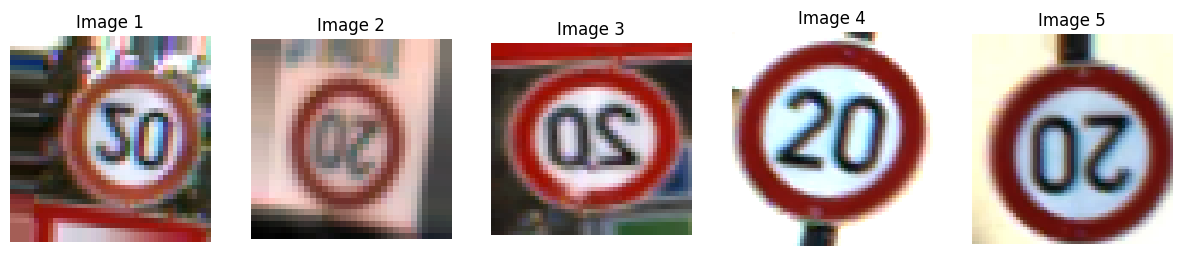

Displaying 5 random augmented images from class 1:


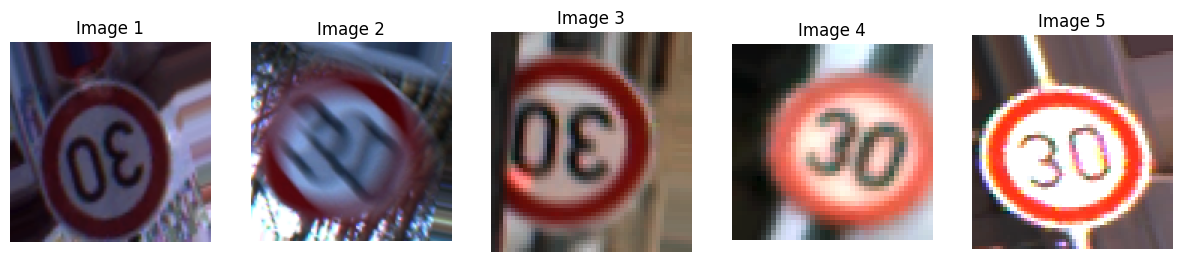

Displaying 5 random augmented images from class 2:


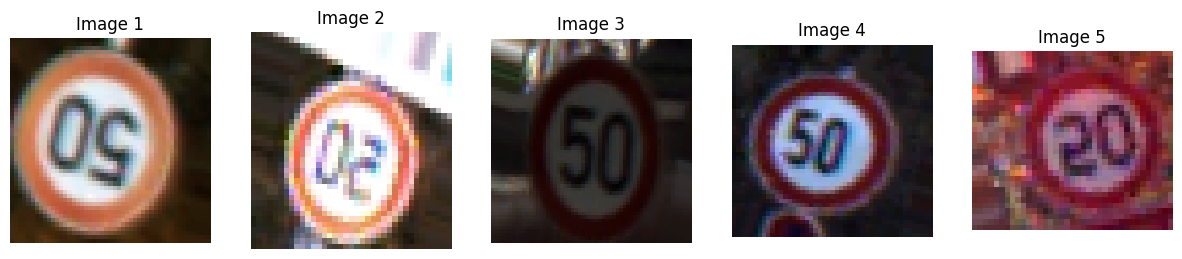

Displaying 5 random augmented images from class 3:


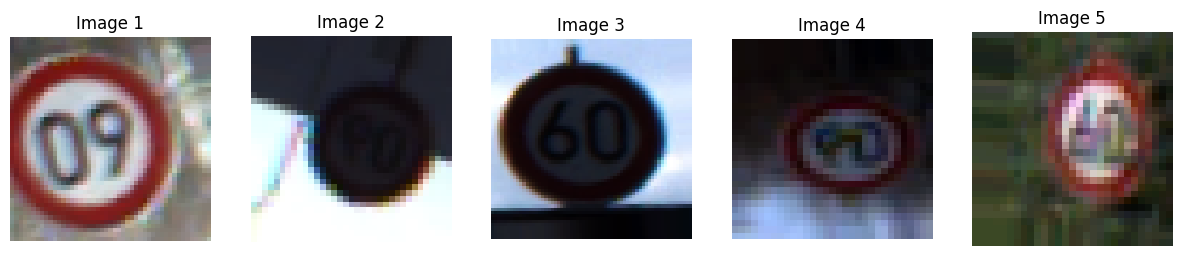

Displaying 5 random augmented images from class 4:


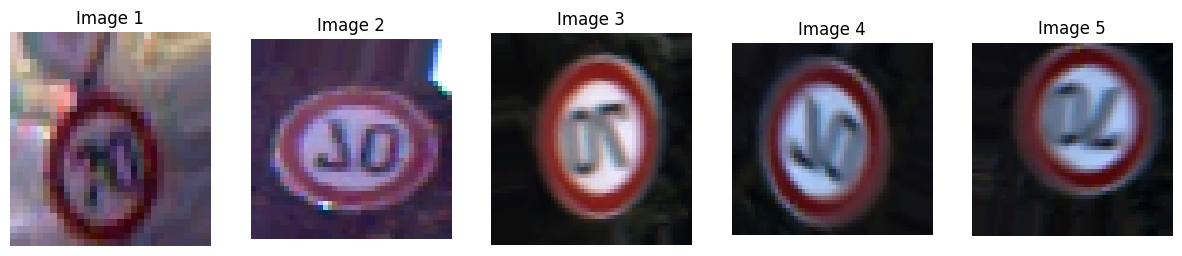

Displaying 5 random augmented images from class 5:


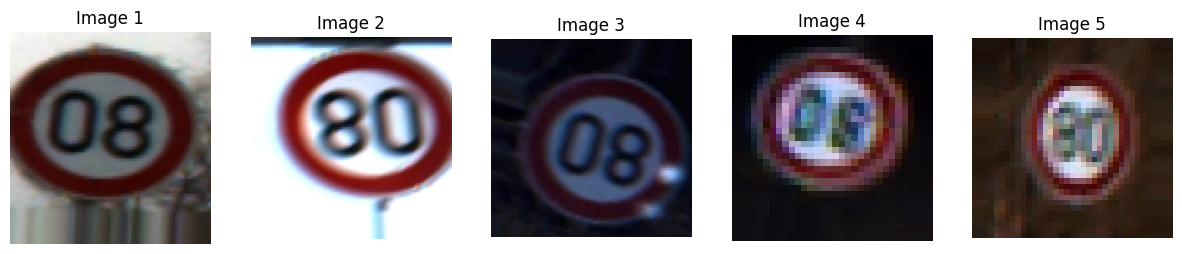

Displaying 5 random augmented images from class 6:


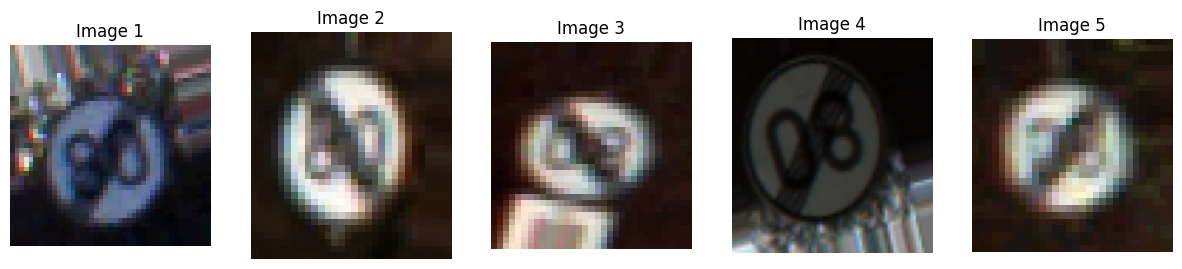

Displaying 5 random augmented images from class 7:


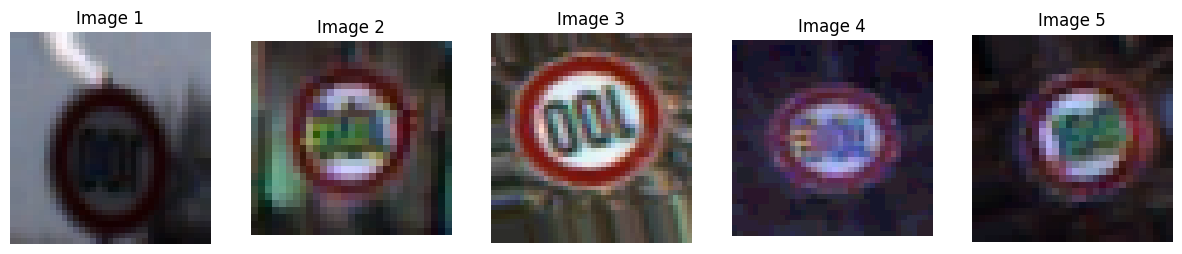

Displaying 5 random augmented images from class 8:


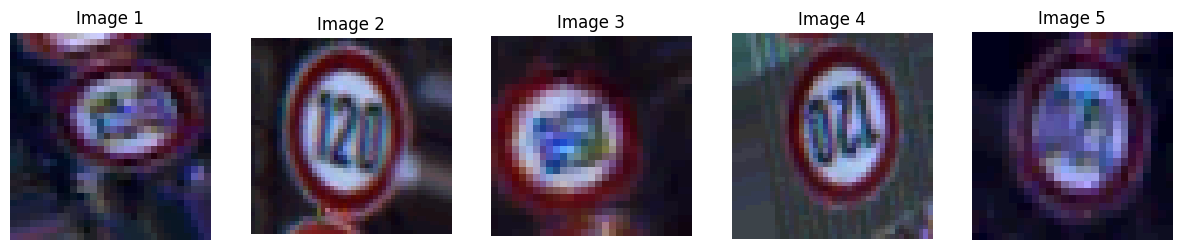

Displaying 5 random augmented images from class 9:


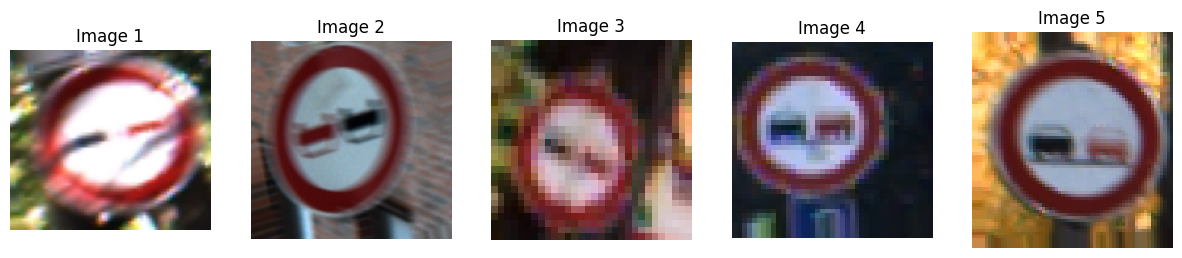

Displaying 5 random augmented images from class 10:


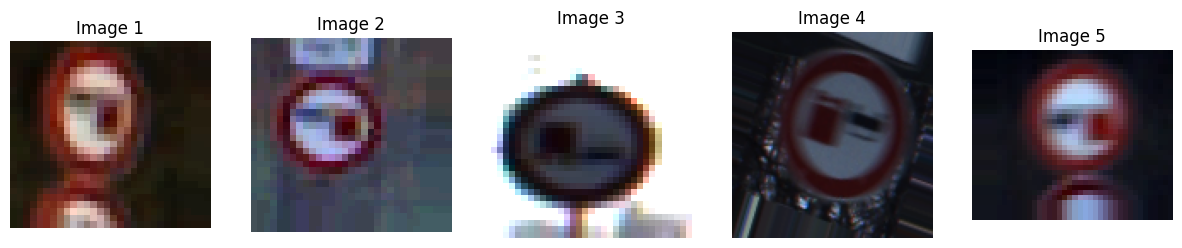

Displaying 5 random augmented images from class 11:


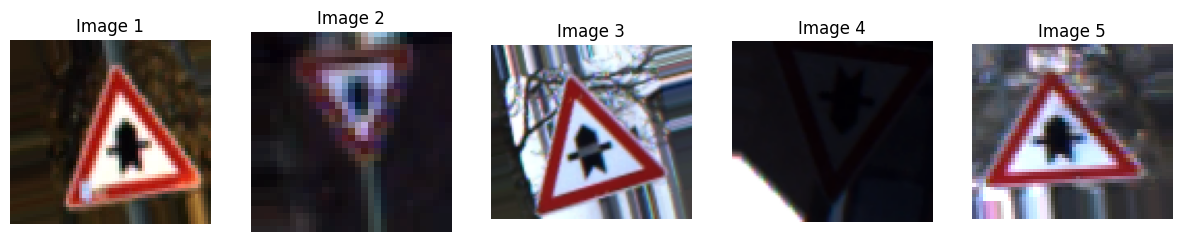

Displaying 5 random augmented images from class 12:


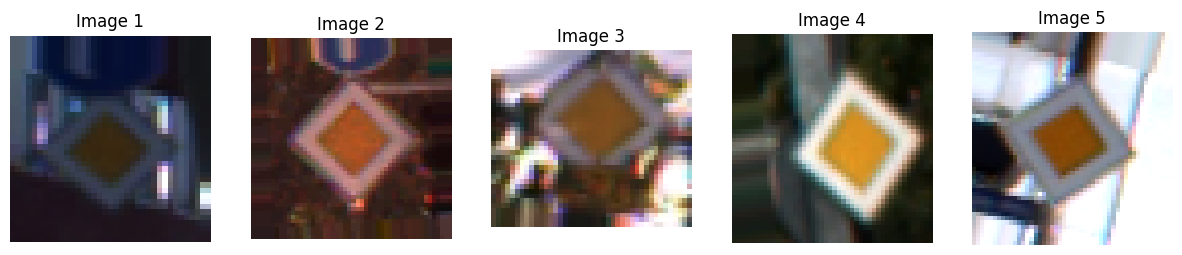

Displaying 5 random augmented images from class 13:


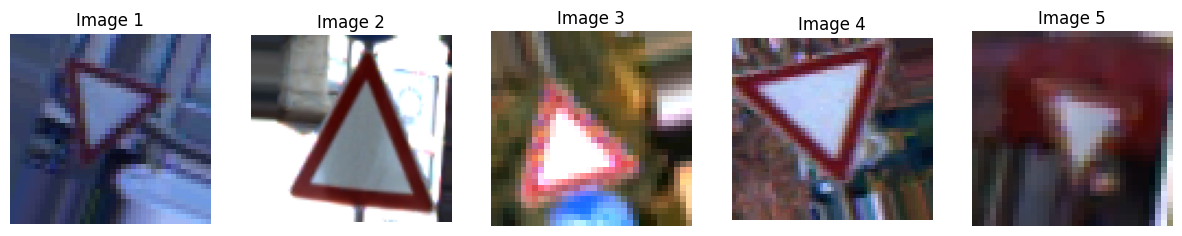

Displaying 5 random augmented images from class 14:


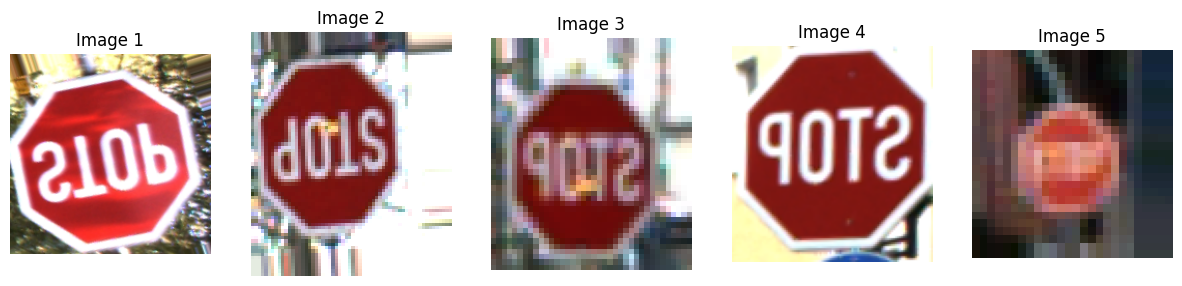

Displaying 5 random augmented images from class 15:


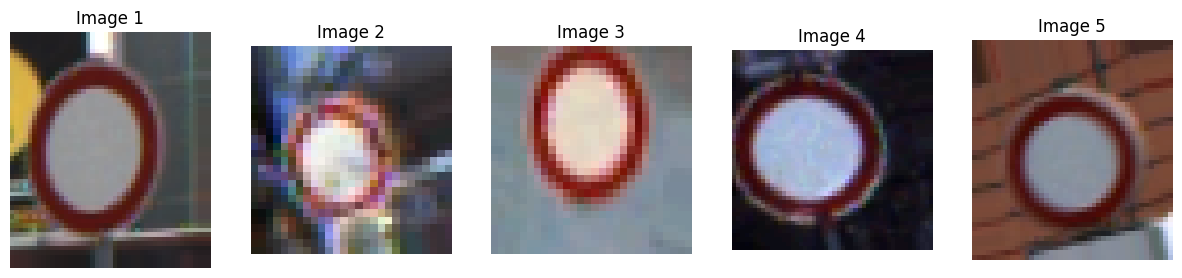

Displaying 5 random augmented images from class 16:


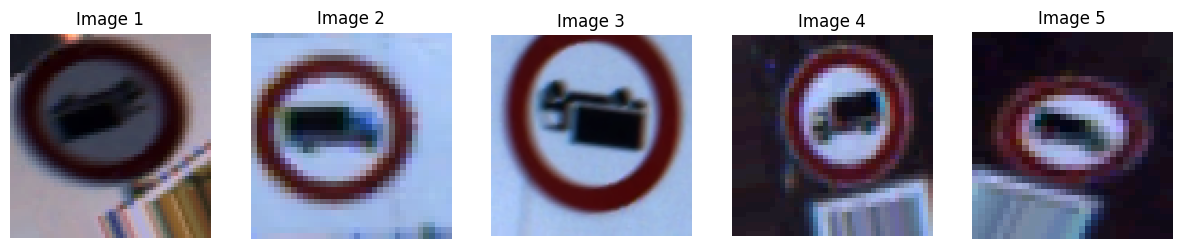

Displaying 5 random augmented images from class 17:


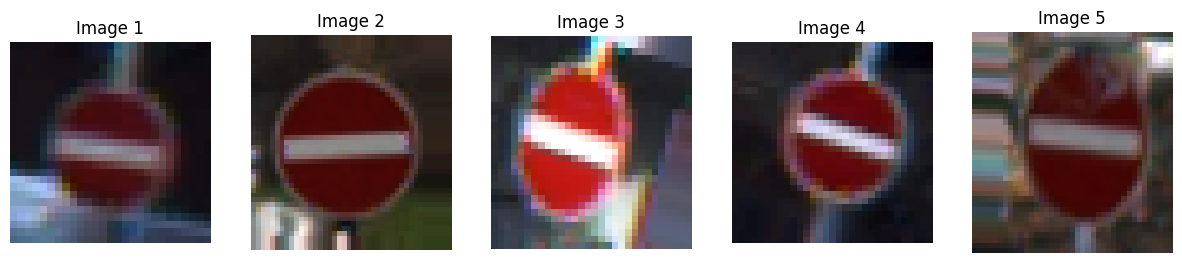

Displaying 5 random augmented images from class 18:


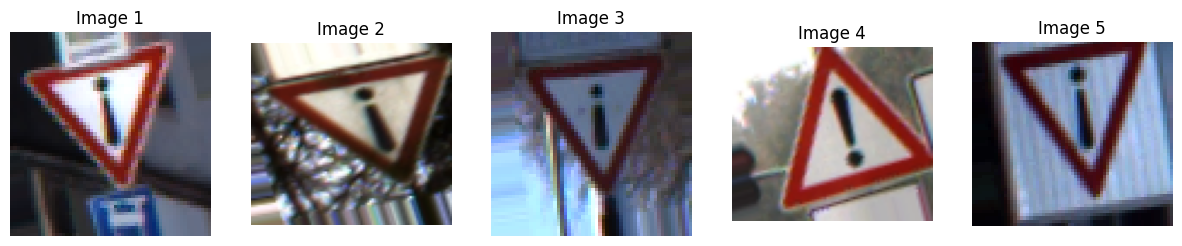

Displaying 5 random augmented images from class 19:


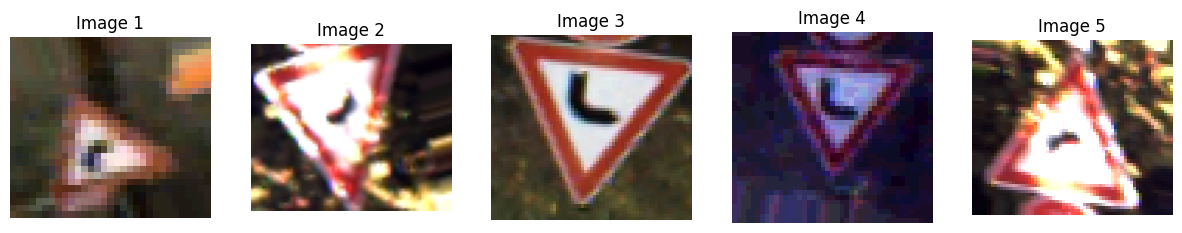

Displaying 5 random augmented images from class 20:


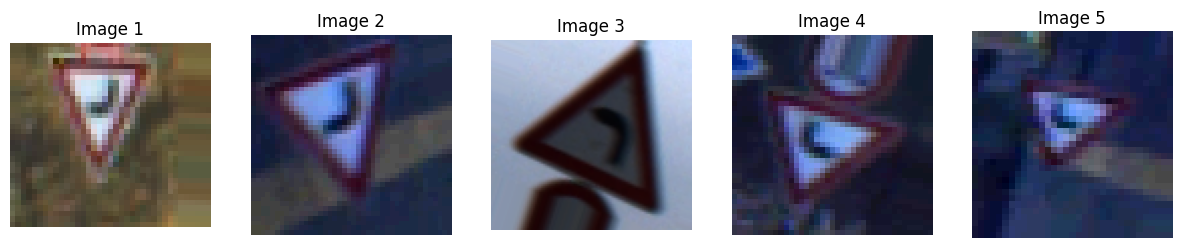

Displaying 5 random augmented images from class 21:


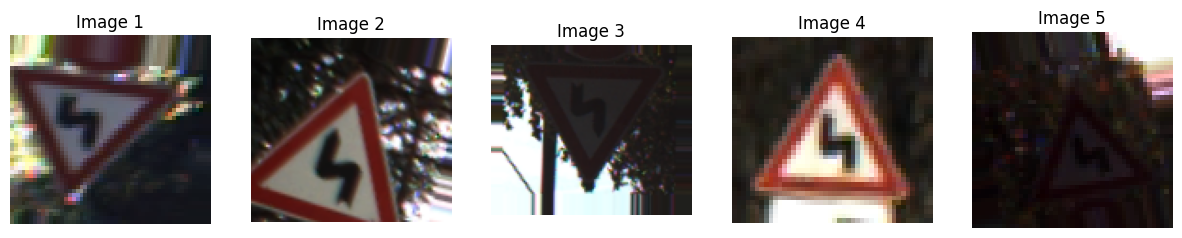

Displaying 5 random augmented images from class 22:


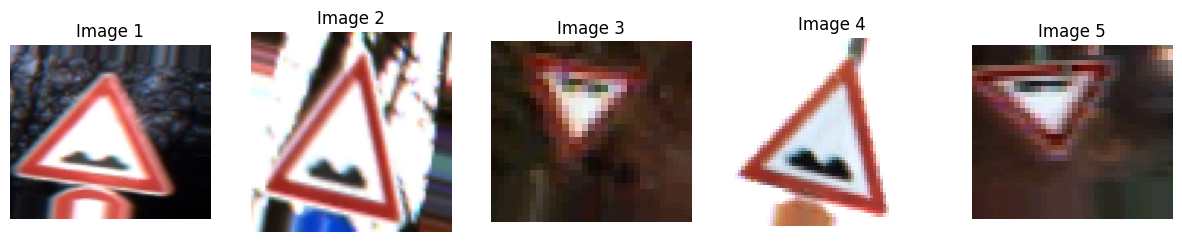

Displaying 5 random augmented images from class 23:


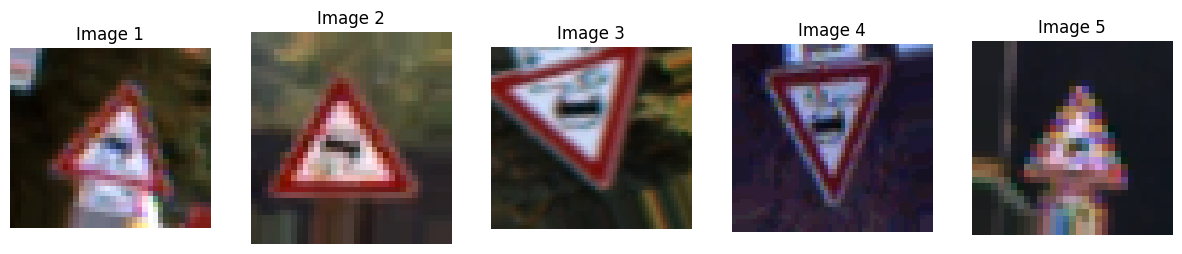

Displaying 5 random augmented images from class 24:


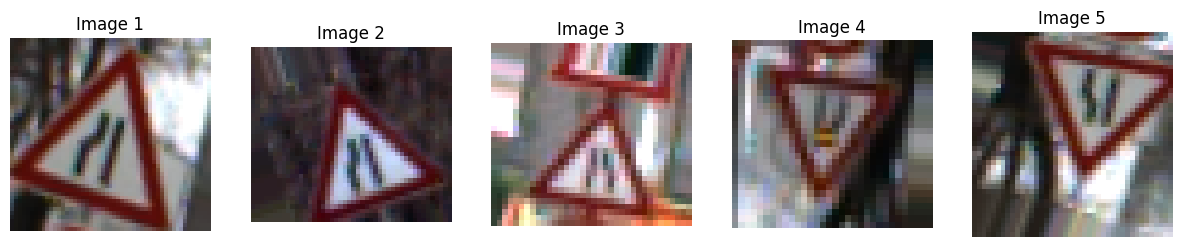

Displaying 5 random augmented images from class 25:


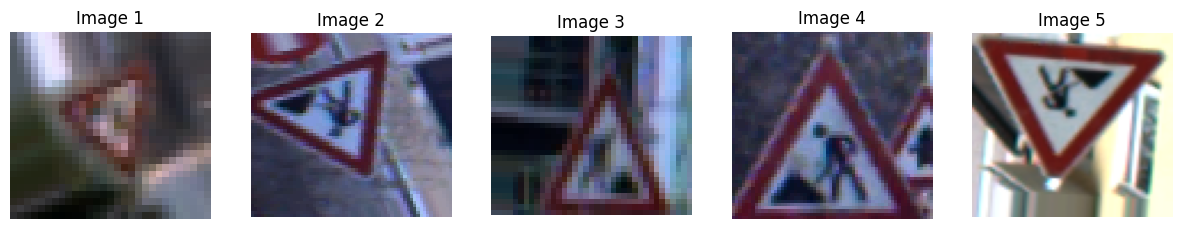

Displaying 5 random augmented images from class 26:


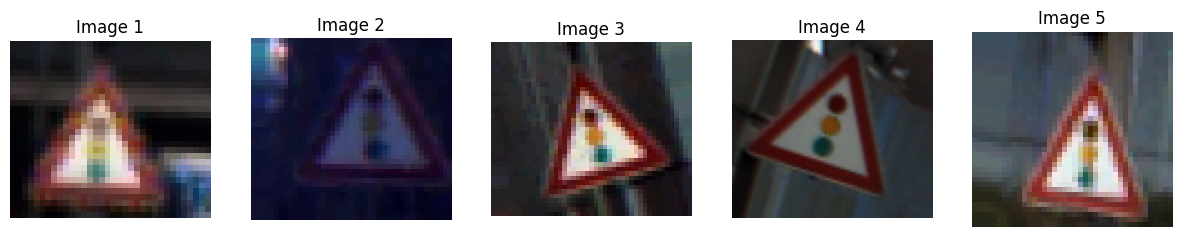

Displaying 5 random augmented images from class 27:


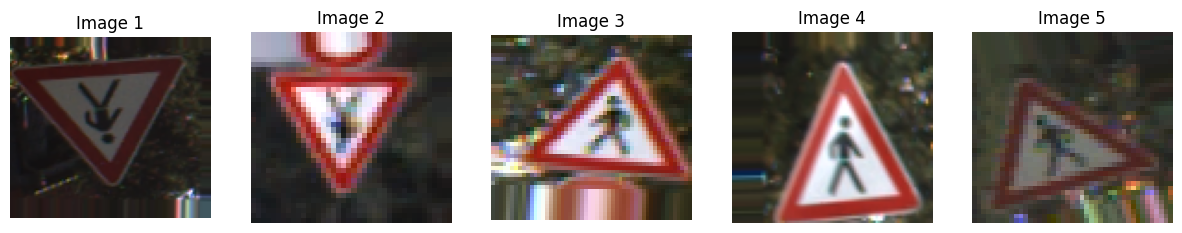

Displaying 5 random augmented images from class 28:


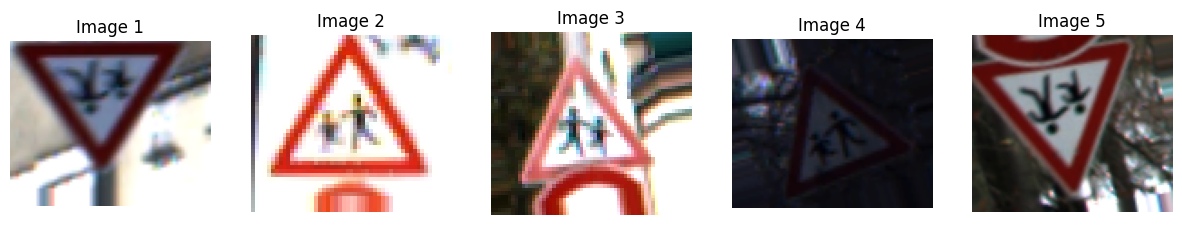

Displaying 5 random augmented images from class 29:


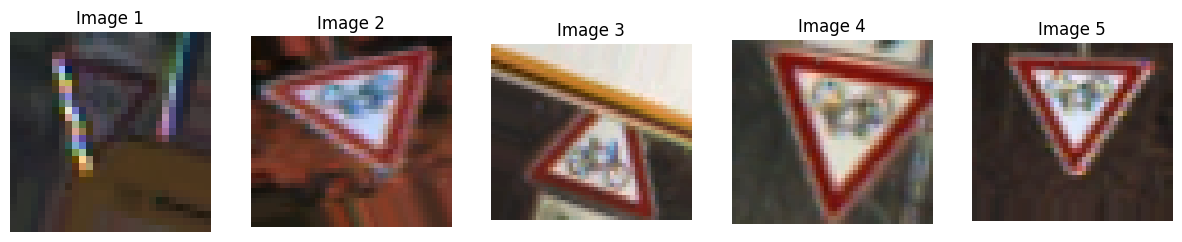

Displaying 5 random augmented images from class 30:


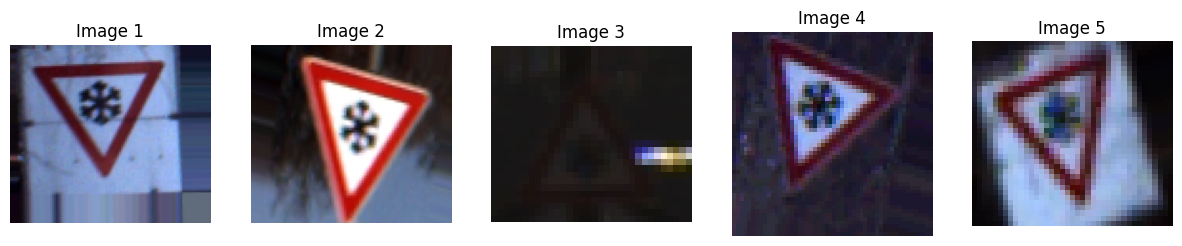

Displaying 5 random augmented images from class 31:


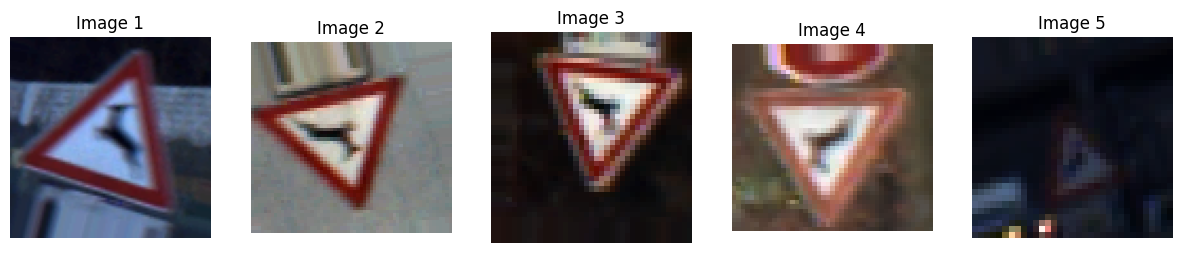

Displaying 5 random augmented images from class 32:


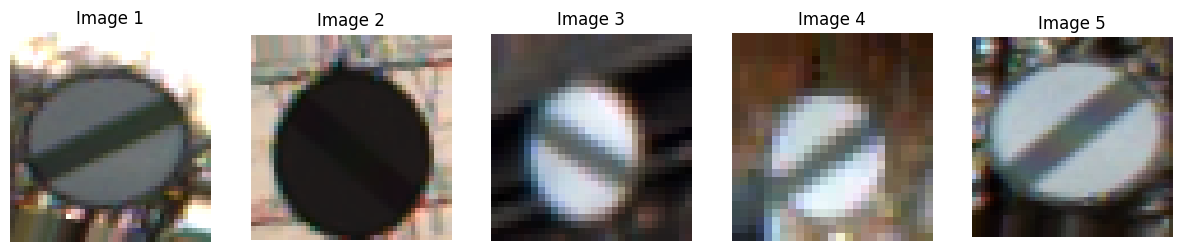

Displaying 5 random augmented images from class 33:


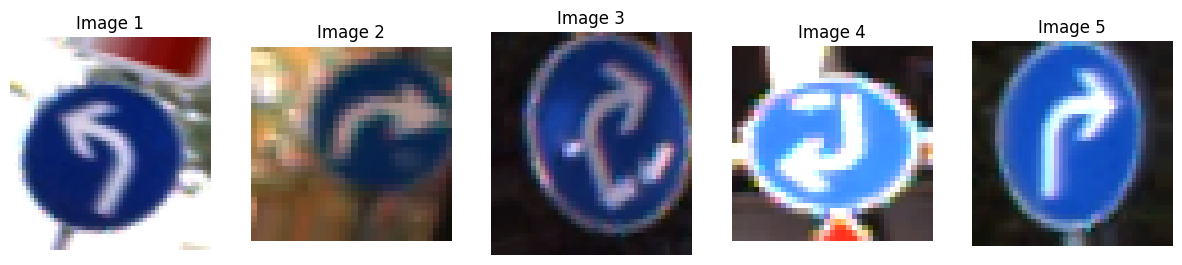

Displaying 5 random augmented images from class 34:


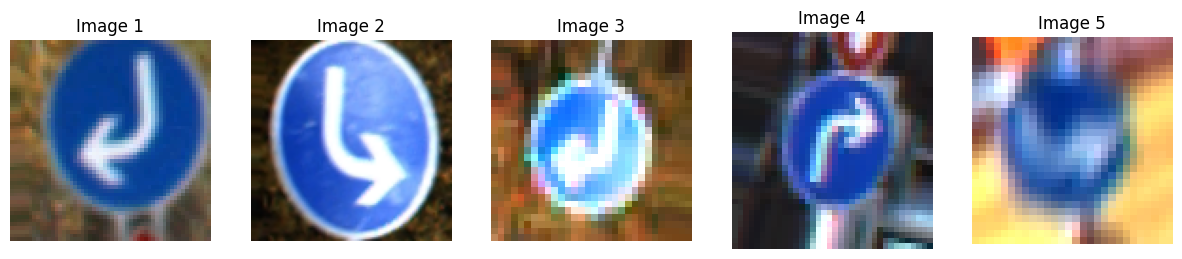

Displaying 5 random augmented images from class 35:


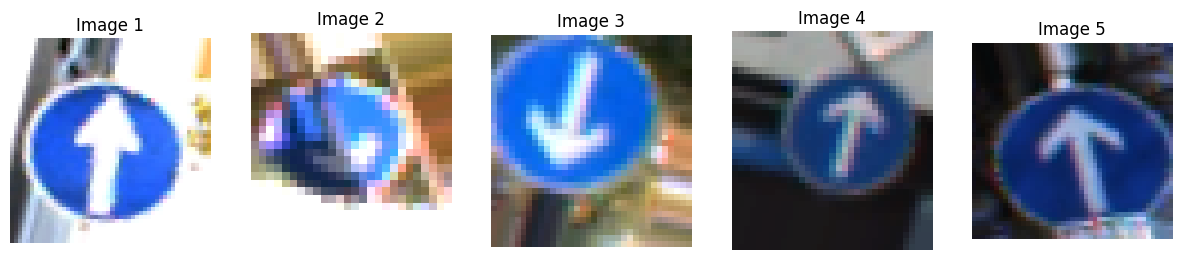

Displaying 5 random augmented images from class 36:


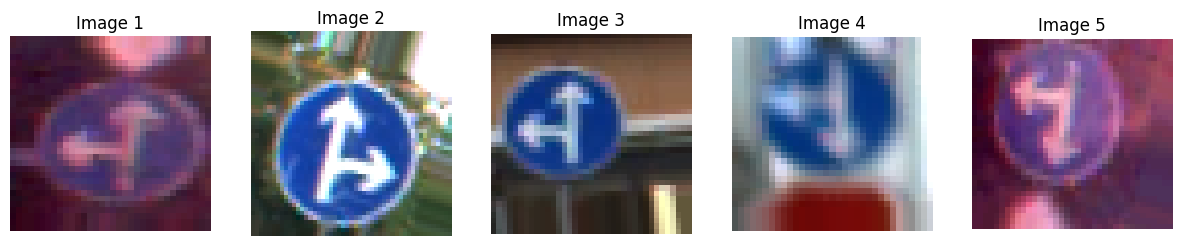

Displaying 5 random augmented images from class 37:


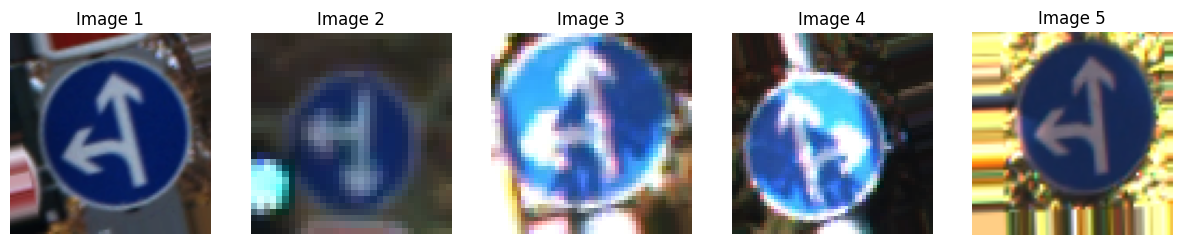

Displaying 5 random augmented images from class 38:


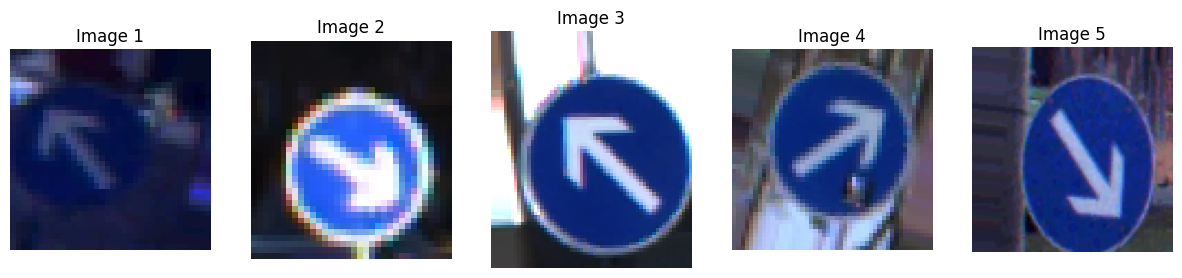

Displaying 5 random augmented images from class 39:


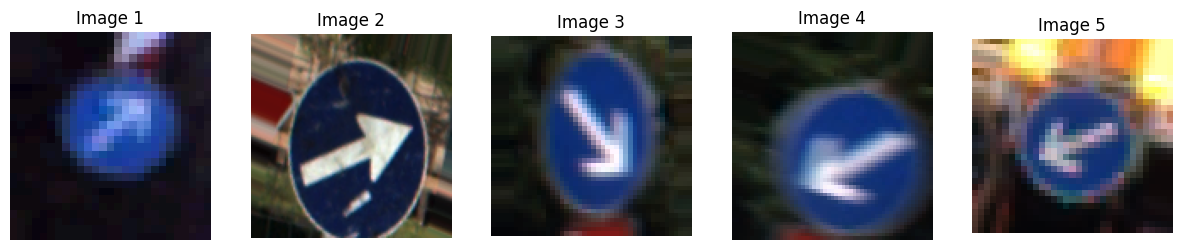

Displaying 5 random augmented images from class 40:


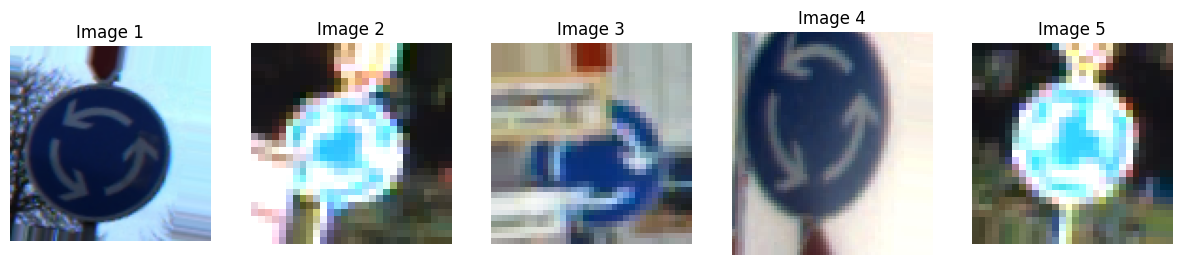

Displaying 5 random augmented images from class 41:


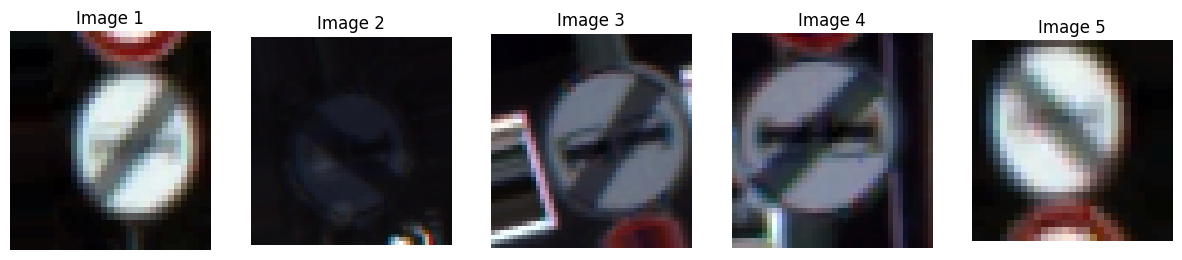

Displaying 5 random augmented images from class 42:


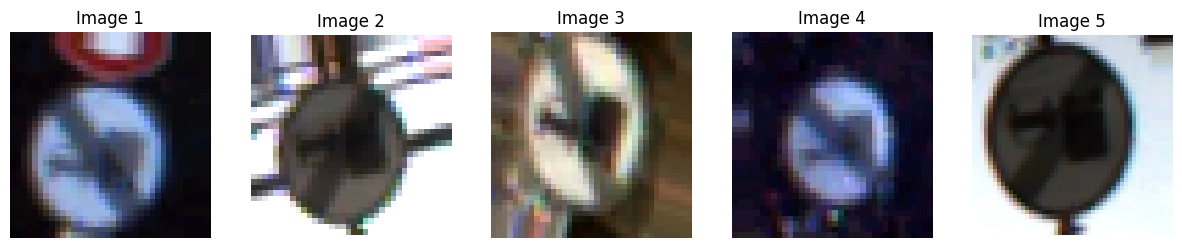

In [ ]:
# funtion to display 5 random augmented images from a given class folder

def display_random_augmented_images(aug_class_path, num_images=5):
    #  aug_class_path : 0 to 42 folders
    # Get a list of all augmented image foldernames
    augmented_images = os.listdir(aug_class_path)
    
    # checking if the sample images are not more than actual image in the augmented folder
    if len(augmented_images) < num_images:
        print(f"Not enough images in {aug_class_path} to display {num_images} images.")
        return
    
    # random sample of 5 image
    randomimage = random.sample(augmented_images, num_images)
    
    plt.figure(figsize=(15, 10))
    
    # loop through the selected random images and display them
    for i, random_image in enumerate(randomimage):
        image_path = os.path.join(aug_class_path, random_image)
        image = load_img(image_path)
        
        # convert image to array for preprocessing and such as normalization resizing
        img_array = img_to_array(image)
        
        plt.subplot(1, 5, i + 1)
        plt.imshow(img_array.astype('uint8'))
        plt.axis('off')  # Hide the axis
        plt.title(f"Image {i + 1}")

    plt.show()

# loop through each class folder (0 to 43) and display 5 random augmented images from each class
for folders in range(43):  # Class labels from 0 to 43
    aug_class_path = os.path.join(outputpath, str(folders))
    
    # displaying 5 random augmented images from this class folder
    print(f"Displaying 5 random augmented images from class {folders}:")
    display_random_augmented_images(aug_class_path, num_images=5)